This is the Model module

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np
import math

In [81]:
# Load train and test data
train_df = pd.read_csv("./3.3 Construct Data/Final Datasets/imputed_budget_train.csv")
test_df = pd.read_csv("./3.3 Construct Data/Final Datasets/imputed_budget_test.csv")

# Define bin edges for Adjusted Merged Budget
bin_edges = np.percentile(train_df['Adj Merged Budget'], [0, 33, 67, 100])
bin_labels = ['1', '2', '3']  # Adjusted the labels to match the number of bins (one less than edges)

# Split train data into three bins based on Adjusted Merged Budget
train_df['Budget Bins'] = pd.cut(train_df['Adj Merged Budget'], bins=bin_edges, labels=bin_labels)
# Split test data into three bins based on Adjusted Merged Budget
test_df['Budget Bins'] = pd.cut(test_df['Adj Merged Budget'], bins=bin_edges, labels=bin_labels)


In [83]:
X_vars = ['Runtime', 'Genre Cluster', 'G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'Holiday', 'Adj Merged Budget', 'Has Star Score', 'Has Director Score', 'Has Production Company Score', 'Has Domestic Distributor Score', 'Unweighted Star Score_normalized', 'Simple Weight Star Score_normalized', 'Log Weight Star Score_normalized', 'Exponential Weight Star Score_normalized', 'Total Director Score_normalized', 'Avg Director Score_normalized', 'Total Production Company Score_normalized', 'Avg Production Company Score_normalized', 'Domestic Distributor Score_normalized', 'Season_ASO_4', 'Season_FMA_2', 'Season_MJJ_3', 'Season_NDJ_1']
# Take the log of revenue
y = ['Adj Merged Revenue']

In [90]:
# Assuming 'train_df', 'test_df', 'X_vars', 'y' are already defined as per the previous code
train_X = train_df[X_vars]
train_y = train_df[y]
test_X = test_df[X_vars]
test_y = test_df[y]
# Create empty dictionaries to hold split dataframes for train and test sets
train_X_ = {}
train_y_ = {}
test_X_ = {}
test_y_ = {}

# Iterate through each bin label and filter data accordingly for both train and test sets
for label in bin_labels:
    # Filter train data into respective bins
    train_X_[label] = train_df[train_df['Budget Bins'] == label][X_vars]
    train_y_[label] = train_df[train_df['Budget Bins'] == label][y]
    
    # Filter test data into respective bins
    test_X_[label] = test_df[test_df['Budget Bins'] == label][X_vars]
    test_y_[label] = test_df[test_df['Budget Bins'] == label]['Adj Merged Revenue']

# Print the shapes of the split datasets for verification
for label in bin_labels:
    print(f"Train_X_bins[{label}] shape: {train_X_[label].shape}")
    print(f"Train_y_bins[{label}] shape: {train_y_[label].shape}")
    print(f"Test_X_bins[{label}] shape: {test_X_[label].shape}")
    print(f"Test_y_bins[{label}] shape: {test_y_[label].shape}")


Train_X_bins[1] shape: (1020, 27)
Train_y_bins[1] shape: (1020, 1)
Test_X_bins[1] shape: (0, 27)
Test_y_bins[1] shape: (0,)
Train_X_bins[2] shape: (1017, 27)
Train_y_bins[2] shape: (1017, 1)
Test_X_bins[2] shape: (30, 27)
Test_y_bins[2] shape: (30,)
Train_X_bins[3] shape: (1068, 27)
Train_y_bins[3] shape: (1068, 1)
Test_X_bins[3] shape: (125, 27)
Test_y_bins[3] shape: (125,)


We decided to use the iterative importer with a random forrest regressor

In [86]:
imp = IterativeImputer(min_value=0, max_iter=1000, random_state=102, estimator=RandomForestRegressor())

Now to build the pipeline, we need the type of models we want to try.

In [91]:
# Step 3: Building the Pipeline
# Assuming train_X and train_y are your training features and target variable
# Convert train_y to a 1D array
train_y = np.ravel(train_y)

pipeline = Pipeline([
    ('imputer', imp),
    ('regressor', RandomForestRegressor())  # RandomForestRegressor without grid search
])

# Train the RandomForestRegressor
pipeline.fit(train_X, train_y)

# Get the trained model
trained_model = pipeline.named_steps['regressor']


Mean Squared Error (MSE): 1798468645821079.0
Mean Absolute Error (MAE): 25407165.47394329
R-squared: 0.27964324900172555


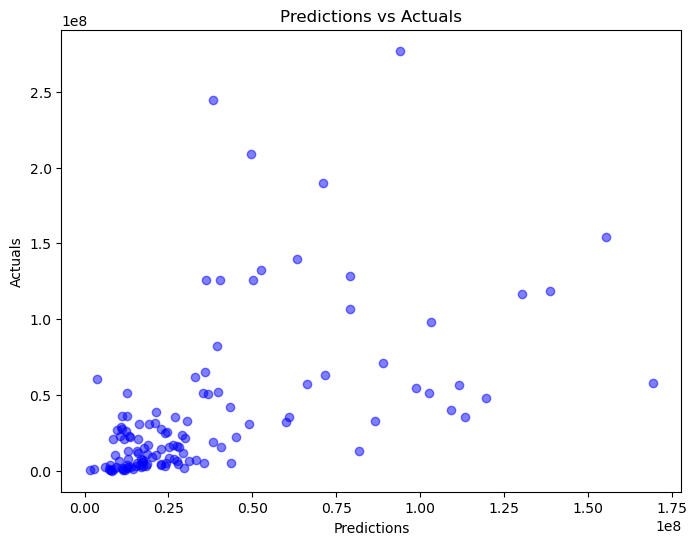

In [96]:
sel='3' #The RHS of the argument is your bin
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have test_X as your test features
# Make predictions using the trained model
predictions = pipeline.predict(test_X_[sel])

# Assuming test_y is your actual target variable for the test data
# Evaluate the model
mae = mean_absolute_error(test_y_[sel], (predictions))
mse = mean_squared_error(test_y_[sel], (predictions))
r_squared = r2_score(test_y_[sel], (predictions))

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)

# Plot predictions vs test_y
plt.figure(figsize=(8, 6))
plt.scatter((predictions), test_y_[sel], color='blue', alpha=0.5)
plt.title('Predictions vs Actuals')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()


Mean Squared Error (MSE): 732782082251142.1
Mean Absolute Error (MAE): 11267198.838392852
R-squared: 0.4963866937108746


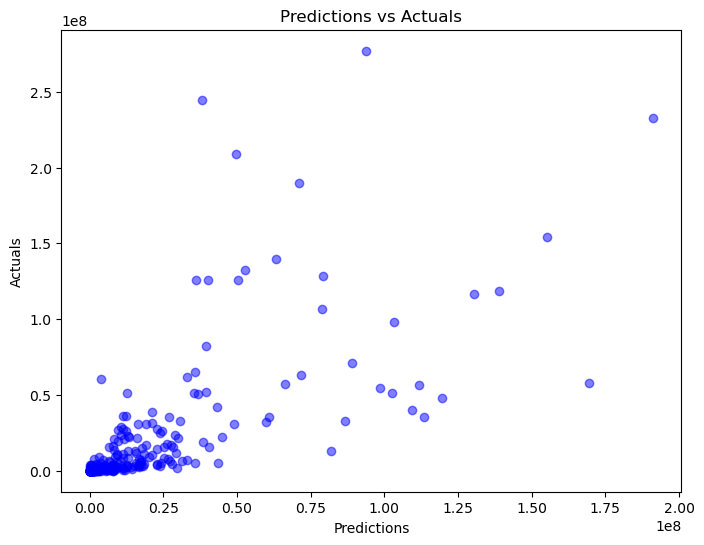

In [97]:
#This tests on the full set
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have test_X as your test features
# Make predictions using the trained model
predictions = pipeline.predict(test_X)

# Assuming test_y is your actual target variable for the test data
# Evaluate the model
mae = mean_absolute_error(test_y, (predictions))
mse = mean_squared_error(test_y, (predictions))
r_squared = r2_score(test_y, (predictions))

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)

# Plot predictions vs test_y
plt.figure(figsize=(8, 6))
plt.scatter((predictions), test_y, color='blue', alpha=0.5)
plt.title('Predictions vs Actuals')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
